## 1. Polarity detection (positive and negative)
### Train: train_pos_neg.csv, Test: test_pos_neg.csv

#### Training data source: different datasets combined

Both train_pos_neg.csv and test_pos_neg.csv has positive and negative labels

In [19]:
import pandas as pd
import string
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import nltk
from joblib import load
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import load

In [2]:
dfTrain = pd.read_csv("train_pos_neg_preprocessed.csv", encoding = 'ISO-8859-1')
dfTest = pd.read_csv("test_pos_neg_preprocessed.csv", encoding = 'ISO-8859-1')

4709


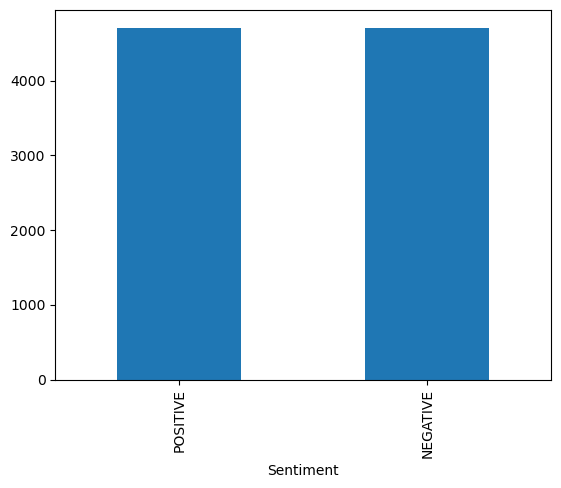

In [3]:
#Class count
count_positive, count_negative = dfTrain.Sentiment.value_counts()
print(count_negative)

#Divide by class
dataset_positive = dfTrain[dfTrain['Sentiment'] == 'POSITIVE']
dataset_negative = dfTrain[dfTrain['Sentiment'] == 'NEGATIVE']

dataset_positive_under = dataset_positive.sample(count_negative)

dataset_balance = pd.concat([dataset_positive_under, dataset_negative], axis=0)
dataset_balance.Sentiment.value_counts().plot(kind='bar');

In [4]:
# #Split the model into Train and Test Dataset
# X_train, X_test, y_train, y_test = model_selection.train_test_split(dataset_balance['Headline_final'],dataset_balance['Label'],test_size=0.3)


X_train, y_train = dataset_balance['Headline_final'], dataset_balance['Sentiment']
X_test, y_test = dfTest['Headline_final'], dfTest['Sentiment']

# Ensemble Voting Method

### Ensemble soft voting method using random forest, svm, and logistic regression with unigrams

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined as per your dataset

# Define pipelines for each of the classifiers including the TF-IDF vectorization
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
])

svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(probability=True, random_state=42))  # Enable probability for soft voting
])


lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression(random_state=42))  # Enable probability for soft voting
])


# Create the ensemble model using voting classifier
# Here 'voting' is set to 'hard'. Change to 'soft' for soft voting if desired
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_pipeline),
    ('svm', svm_pipeline),
    ('lr', lr_pipeline)
], voting='soft')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predict with the ensemble model
predictions = voting_clf.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of ensemble model: {accuracy}")
print("Classification report:\n", classification_report(y_test, predictions))


Accuracy of ensemble model: 0.7460711331679074
Classification report:
               precision    recall  f1-score   support

    NEGATIVE       0.83      0.62      0.71       601
    POSITIVE       0.70      0.87      0.78       608

    accuracy                           0.75      1209
   macro avg       0.76      0.75      0.74      1209
weighted avg       0.76      0.75      0.74      1209



### Ensemble soft voting method using random forest, svm, and logistic regression with unigrams and bigrams

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined as per your dataset

# Define pipelines for each of the classifiers including the TF-IDF vectorization
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
])

svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('svm', SVC(probability=True, random_state=42))  # Enable probability for soft voting
])


lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('logreg', LogisticRegression(random_state=42))  # Enable probability for soft voting
])


# Create the ensemble model using voting classifier
# Here 'voting' is set to 'hard'. Change to 'soft' for soft voting if desired
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_pipeline),
    ('svm', svm_pipeline),
    ('lr', lr_pipeline)
], voting='soft')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predict with the ensemble model
predictions = voting_clf.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of ensemble model: {accuracy}")
print("Classification report:\n", classification_report(y_test, predictions))


Accuracy of ensemble model: 0.7411083540115798
Classification report:
               precision    recall  f1-score   support

    NEGATIVE       0.81      0.63      0.71       601
    POSITIVE       0.70      0.85      0.77       608

    accuracy                           0.74      1209
   macro avg       0.75      0.74      0.74      1209
weighted avg       0.75      0.74      0.74      1209



### Ensemble hard voting method using random forest, svm, and logistic regression with unigrams

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined as per your dataset

# Define pipelines for each of the classifiers including the TF-IDF vectorization
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
])

svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(probability=True, random_state=42))  # Enable probability for soft voting
])


lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression(random_state=42))  # Enable probability for soft voting
])


# Create the ensemble model using voting classifier
# Here 'voting' is set to 'hard'. Change to 'soft' for soft voting if desired
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_pipeline),
    ('svm', svm_pipeline),
    ('lr', lr_pipeline)
], voting='hard')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predict with the ensemble model
predictions = voting_clf.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of ensemble model: {accuracy}")
print("Classification report:\n", classification_report(y_test, predictions))


Accuracy of ensemble model: 0.7377998345740281
Classification report:
               precision    recall  f1-score   support

    NEGATIVE       0.83      0.60      0.69       601
    POSITIVE       0.69      0.88      0.77       608

    accuracy                           0.74      1209
   macro avg       0.76      0.74      0.73      1209
weighted avg       0.76      0.74      0.73      1209



### Ensemble hard voting method using random forest, svm, and logistic regression with unigrams and bigrams

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined as per your dataset

# Define pipelines for each of the classifiers including the TF-IDF vectorization
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
])

svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('svm', SVC(probability=True, random_state=42))  # Enable probability for soft voting
])


lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('logreg', LogisticRegression(random_state=42))  # Enable probability for soft voting
])


# Create the ensemble model using voting classifier
# Here 'voting' is set to 'hard'. Change to 'soft' for soft voting if desired
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_pipeline),
    ('svm', svm_pipeline),
    ('lr', lr_pipeline)
], voting='hard')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predict with the ensemble model
predictions = voting_clf.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of ensemble model: {accuracy}")
print("Classification report:\n", classification_report(y_test, predictions))


Accuracy of ensemble model: 0.739454094292804
Classification report:
               precision    recall  f1-score   support

    NEGATIVE       0.82      0.61      0.70       601
    POSITIVE       0.69      0.87      0.77       608

    accuracy                           0.74      1209
   macro avg       0.76      0.74      0.73      1209
weighted avg       0.76      0.74      0.74      1209



### Ensemble hard voting method using random forest and SVM
### Not used in Project

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined as per your dataset

# Define pipelines for each of the classifiers including the TF-IDF vectorization
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
])

svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(probability=True, random_state=42))  # Enable probability for soft voting
])

# Create the ensemble model using voting classifier
# Here 'voting' is set to 'hard'. Change to 'soft' for soft voting if desired
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_pipeline),
    ('svm', svm_pipeline)
], voting='hard')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predict with the ensemble model
predictions = voting_clf.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of ensemble model: {accuracy}")
print("Classification report:\n", classification_report(y_test, predictions))


Accuracy of ensemble model: 0.7460711331679074
Classification report:
               precision    recall  f1-score   support

    NEGATIVE       0.79      0.67      0.72       601
    POSITIVE       0.72      0.82      0.76       608

    accuracy                           0.75      1209
   macro avg       0.75      0.75      0.74      1209
weighted avg       0.75      0.75      0.74      1209



# Ensemble Stacking Methods

### Ensemble stacking method using ZhengWei logreg and MJ SVM with unigram
### Not used in project

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

logreg_model = load("logreg_model_posneg.joblib")

# Update: Adding Logistic Regression and Multinomial Naive Bayes to the base classifiers
base_classifiers = [
    ('rf_pipeline', make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))),
    ('svm_pipeline', make_pipeline(TfidfVectorizer(), SVC(probability=True, random_state=42))),
    ('lr_pipeline', make_pipeline(TfidfVectorizer(), logreg_model))
]

# Keeping Logistic Regression as the meta-classifier
meta_classifier = LogisticRegression(random_state=42)

# Define the stacking ensemble model
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier, cv=5)

# Training the stacking ensemble model
stacking_clf.fit(X_train, y_train)

# Predicting with the stacking ensemble model
predictions = stacking_clf.predict(X_test)

# Evaluating the stacking ensemble model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of stacking ensemble model: {accuracy}")
print("Classification report:\n", classification_report(y_test, predictions))


C:\Users\Beh Ming Jun\anaconda3\envs\classify\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Accuracy of stacking ensemble model: 0.7543424317617866
Classification report:
               precision    recall  f1-score   support

    NEGATIVE       0.78      0.70      0.74       601
    POSITIVE       0.73      0.81      0.77       608

    accuracy                           0.75      1209
   macro avg       0.76      0.75      0.75      1209
weighted avg       0.76      0.75      0.75      1209



In [ ]:
logreg_model = load("logreg_model_posneg.joblib")

### Ensemble stacking method using ZhengWei logreg and MJ SVM with unigram and bigram
### Not used in project

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

logreg_model = load("logreg_model_posneg.joblib")

# Update: Adding Logistic Regression and Multinomial Naive Bayes to the base classifiers
base_classifiers = [
    ('rf_pipeline', make_pipeline(TfidfVectorizer(ngram_range=(1,2)), RandomForestClassifier(n_estimators=100, random_state=42))),
    ('svm_pipeline', make_pipeline(TfidfVectorizer(ngram_range=(1,2)), SVC(probability=True, random_state=42))),
    ('lr_pipeline', make_pipeline(TfidfVectorizer(ngram_range=(1,2)), logreg_model))
]

# Keeping Logistic Regression as the meta-classifier
meta_classifier = LogisticRegression(random_state=42)

# Define the stacking ensemble model
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier, cv=5)

# Training the stacking ensemble model
stacking_clf.fit(X_train, y_train)

# Predicting with the stacking ensemble model
predictions = stacking_clf.predict(X_test)

# Evaluating the stacking ensemble model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of stacking ensemble model: {accuracy}")
print("Classification report:\n", classification_report(y_test, predictions))


C:\Users\Beh Ming Jun\anaconda3\envs\classify\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Accuracy of stacking ensemble model: 0.738626964433416
Classification report:
               precision    recall  f1-score   support

    NEGATIVE       0.75      0.71      0.73       601
    POSITIVE       0.73      0.77      0.75       608

    accuracy                           0.74      1209
   macro avg       0.74      0.74      0.74      1209
weighted avg       0.74      0.74      0.74      1209



### Ensemble Stacking method using random forest, SVM, logreg, naive bayes on unigrams
### Not used in project

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Update: Adding Logistic Regression and Multinomial Naive Bayes to the base classifiers
base_classifiers = [
    ('rf_pipeline', make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))),
    ('svm_pipeline', make_pipeline(TfidfVectorizer(), SVC(probability=True, random_state=42))),
    ('lr_pipeline', make_pipeline(TfidfVectorizer(), LogisticRegression(random_state=42))),
    ('nb_pipeline', make_pipeline(TfidfVectorizer(), MultinomialNB()))
]

# Keeping Logistic Regression as the meta-classifier
meta_classifier = LogisticRegression(random_state=42)

# Define the stacking ensemble model
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier, cv=5)

# Training the stacking ensemble model
stacking_clf.fit(X_train, y_train)

# Predicting with the stacking ensemble model
predictions = stacking_clf.predict(X_test)

# Evaluating the stacking ensemble model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of stacking ensemble model: {accuracy}")
print("Classification report:\n", classification_report(y_test, predictions))


Accuracy of stacking ensemble model: 0.7427626137303557
Classification report:
               precision    recall  f1-score   support

    NEGATIVE       0.80      0.64      0.71       601
    POSITIVE       0.70      0.85      0.77       608

    accuracy                           0.74      1209
   macro avg       0.75      0.74      0.74      1209
weighted avg       0.75      0.74      0.74      1209



### Ensemble Stacking method using random forest, SVM, logreg, naive bayes on unigrams and bigrams
### Not used in project

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Update: Adding Logistic Regression and Multinomial Naive Bayes to the base classifiers
base_classifiers = [
    ('rf_pipeline', make_pipeline(TfidfVectorizer(ngram_range=(1,2)), RandomForestClassifier(n_estimators=100, random_state=42))),
    ('svm_pipeline', make_pipeline(TfidfVectorizer(ngram_range=(1,2)), SVC(probability=True, random_state=42))),
    ('lr_pipeline', make_pipeline(TfidfVectorizer(ngram_range=(1,2)), LogisticRegression(random_state=42))),
    ('nb_pipeline', make_pipeline(TfidfVectorizer(ngram_range=(1,2)), MultinomialNB()))
]

# Keeping Logistic Regression as the meta-classifier
meta_classifier = LogisticRegression(random_state=42)

# Define the stacking ensemble model
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier, cv=5)

# Training the stacking ensemble model
stacking_clf.fit(X_train, y_train)

# Predicting with the stacking ensemble model
predictions = stacking_clf.predict(X_test)

# Evaluating the stacking ensemble model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of stacking ensemble model: {accuracy}")
print("Classification report:\n", classification_report(y_test, predictions))


Accuracy of stacking ensemble model: 0.739454094292804
Classification report:
               precision    recall  f1-score   support

    NEGATIVE       0.77      0.67      0.72       601
    POSITIVE       0.71      0.80      0.76       608

    accuracy                           0.74      1209
   macro avg       0.74      0.74      0.74      1209
weighted avg       0.74      0.74      0.74      1209



### Ensemble Stacking method using random forest and SVM with only unigrams

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Base classifiers for the stacking ensemble, each with a TF-IDF vectorizer
base_classifiers = [
    ('rf_pipeline', make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))),
    ('svm_pipeline', make_pipeline(TfidfVectorizer(), SVC(probability=True, random_state=42)))
]

# Meta-classifier
meta_classifier = LogisticRegression(random_state=42)

# Stacking ensemble classifier, combining the base classifiers and using a meta-classifier
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier, cv=5)

# Train the stacking ensemble model
stacking_clf.fit(X_train, y_train)

# Predict with the stacking ensemble model
predictions = stacking_clf.predict(X_test)

# Evaluate the stacking ensemble model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of stacking ensemble model: {accuracy}")
print("Classification report:\n", classification_report(y_test, predictions))


Accuracy of stacking ensemble model: 0.7568238213399504
Classification report:
               precision    recall  f1-score   support

    NEGATIVE       0.78      0.71      0.74       601
    POSITIVE       0.74      0.80      0.77       608

    accuracy                           0.76      1209
   macro avg       0.76      0.76      0.76      1209
weighted avg       0.76      0.76      0.76      1209



### Ensemble Stacking method using random forest and SVM with unigrams and bigrams

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Base classifiers for the stacking ensemble, each with a TF-IDF vectorizer
base_classifiers = [
    ('rf_pipeline', make_pipeline(TfidfVectorizer(ngram_range=(1,2)), RandomForestClassifier(n_estimators=100, random_state=42))),
    ('svm_pipeline', make_pipeline(TfidfVectorizer(ngram_range=(1,2)), SVC(probability=True, random_state=42)))
]

# Meta-classifier
meta_classifier = LogisticRegression(random_state=42)

# Stacking ensemble classifier, combining the base classifiers and using a meta-classifier
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier, cv=5)

# Train the stacking ensemble model
stacking_clf.fit(X_train, y_train)

# Predict with the stacking ensemble model
predictions = stacking_clf.predict(X_test)

# Evaluate the stacking ensemble model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of stacking ensemble model: {accuracy}")
print("Classification report:\n", classification_report(y_test, predictions))


Accuracy of stacking ensemble model: 0.7485525227460711
Classification report:
               precision    recall  f1-score   support

    NEGATIVE       0.77      0.70      0.73       601
    POSITIVE       0.73      0.80      0.76       608

    accuracy                           0.75      1209
   macro avg       0.75      0.75      0.75      1209
weighted avg       0.75      0.75      0.75      1209



### Saving the Models

In [12]:
# from joblib import dump, load

# # Save the model to a file
# model_filename = 'svm_ensemble_stacking_75682.joblib'  # Specifying a path in your environment
# dump(stacking_clf, model_filename)

# print(f"Model saved to {model_filename}")




Model saved to svm_ensemble_stacking_75682.joblib
